# Darkness and Light in Mansfield

## Yifan Song

14 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

In [3]:
import spacy
import nltk
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd

Light and darkness are two of the most commonly used symbols and motifs in literature. Light tends to represent positive concepts such as life, freedom, hope, etc, whereas darkness usually represents negative concepts such as death and helplessness. A combination of computational analysis and close reading reveals to us that, in Mansfield's stories, darkness and light are used to symbolize a state of being trapped or confined and a state of being freed from that confinement respectively. The symbolisms of light and darkness also provide insights into the characters and themes including gender, relationship, and social classe. 

Before beginning the analysis we create the corpus we will be using, which includes the short stories "The Garden Party," "The Daughters of the Late Colonel," "The Young Girl," "Marriage a la Mode, " "Miss Brill," "Her First Ball," and "An Ideal Family." This is achieved by creating a dictionary whose keys are the titles of the stories and whose values are the stories' text, each extracted using boundaries from *The Garden Party and Other Stories*. 

In [18]:
# Opening the garden party text file
with open('garden-party.txt') as gardenPartyFile:
    gardenParty = gardenPartyFile.read()
    
# The function that extracts the text according to the boundaries given
def getText(boundaryPair, gardenParty):
    storyText = ""
    start, end = boundaryPair
    startLocation = gardenParty.find(start)
    endLocation = gardenParty.find(end)
    textChunk = gardenParty[startLocation:endLocation]
    storyText += textChunk
    return storyText

# The dictionary containing the stories' titles and their corresponding boundaries. 
storyBoundaries = {
    "TheGardenParty": ["And after all the weather was ideal. They could not have had a more",
                        "# 3. THE DAUGHTERS OF THE LATE COLONEL."],
    "TheDaughtersOfTheLateColonel": ["The week after was one of the busiest weeks of their lives. Even when",
                                      "# 4. MR. AND MRS. DOVE."],
    "TheYoungGirl": ["In her blue dress, with her cheeks lightly flushed, her blue, blue eyes,"
                      , "# 6. LIFE OF MA PARKER."],
    "MarriageALaMode": ["On his way to the station William remembered with a fresh pang of"
                         , "# 8. THE VOYAGE."], 
    "MissBrill": ["Although it was so brilliantly fine---the blue sky powdered with gold",
                   "# 10. HER FIRST BALL."], 
    "HerFirstBall": ["Exactly when the ball began Leila would have found it hard to say.",
                      "# 11. THE SINGING LESSON."], 
    "AnIdealFamily": ["That evening for the first time in his life, as he pressed through the",
                       "# 15. The Lady's Maid"]
}

# Dictionary containing the stories' titles and their texts. 
shortStories = {}
for story in storyBoundaries.keys():
    storyText = getText(storyBoundaries[story], gardenParty)
    shortStories[story] = storyText
    
# Dictionary containing the stories' titles and their tokenized texts. 
shortStoriesTokens = {key: nltk.word_tokenize(val.lower()) for key, val in shortStories.items()}

We begin the analysis by graphing the distribution of darkness and light in each of the stories. This is achieved by first compiling words that represent light and darkness, and then graphing the number of times they appear across each of the stories. To better interpret the graphs, a vertical line is added at the location of important instances in each of the stories, which also helps split the stories into meaningful sections. The limitation of this technique is that it is an approximation, especially since the data is divided into bins to help visualization.

In [94]:
# Compiling words that prepresent light and darkness. 
lightRepWords = ['light', 'gold', 'shine', 'gleam', 'sun', 'bright', 'radiant', 'spark', 'twinkle', 'illume', 'lamp', 'sprinkle', 'star']
darknessRepWords = ['dark', 'shadow', 'gloom', 'night', 'darkness', 'cloud', 'dusk', 'dusky', 'shade']

In [95]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [96]:
def binnedTokens(wordList, story):
    indices = [i for i, token in enumerate(shortStoriesTokens[story]) if lemmatizer.lemmatize(token) in wordList]
    categories, bins = pd.cut(range(len(shortStoriesTokens[story])), bins = 15, retbins = True)
    binned = pd.cut(indices, bins).value_counts()
    return binned

In [97]:
def plotNarrativeTimes(wordLists, story):
    wordsAndLocations = {wordList[0]: binnedTokens(wordList, story) for wordList in wordLists}
    return pd.DataFrame(wordsAndLocations).plot()

In [98]:
def findLocation(story, marker):
    #print(shortStories[story])
    markerIndex = shortStories[story].index(marker)
    return markerIndex/len(shortStories[story]) * 15

In [99]:
# Dictionary whose keys are the titles of the stories and whose values are each story's list of sentences that marks the instances. 
markersDict = {
    "TheGardenParty": ['It was just growing dusky as Laura shut their garden gates.'],
    "TheDaughtersOfTheLateColonel": ['Another thing which complicated matters was they had Nurse Andrews\nstaying on with them that week.',
                                     'It had made it very awkward for them when Mr.\xa0Farolles, of St.\xa0John\'s,\ncalled the same afternoon.',
                                     'they went into his room to go through his\nthings',
                                     'She walked over to the mantelpiece to her favourite\nBuddha.'],
    "TheYoungGirl": ["So we three were left. But really it wasn\'t my fault."
                      , "But at that moment a tragedy happened to Hennie.", 
                     'And then we were outside again. It had grown dusky.', 
                     'But no---she wouldn\'t do that.'
                    ],
    "MarriageALaMode": ['"Hillo, William!" She was at the station after all,'
                         , "It was not until William was waiting for his taxi the next afternoon\nthat he found himself alone with Isabel.", 
                       'He\'s sending you back your marriage lines as a gentle reminder.'], 
    "MissBrill": ['The old people sat on the bench, still as statues.',
                  "Just at that moment a boy and girl came and sat down where the old\ncouple had been."], 
    "HerFirstBall": ['"It hardly bears thinking about, does it?" said the fat man gloomily',
                      "Again the couples paraded."], 
    "AnIdealFamily": ["Through the drawing-room door that was ajar voices floated.",
                       "What legs he had! They were\nlike a spider\'s---thin, withered."]
}

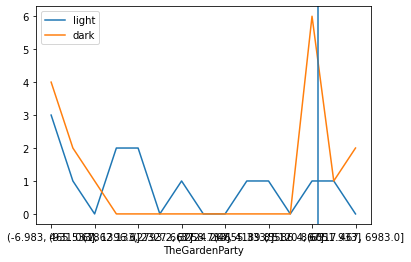

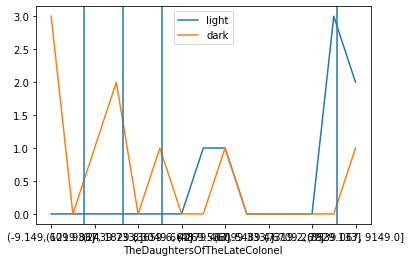

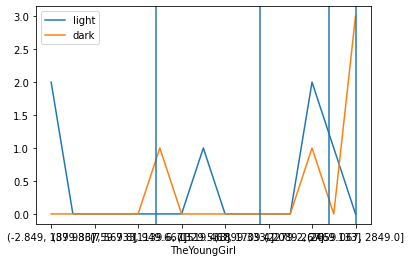

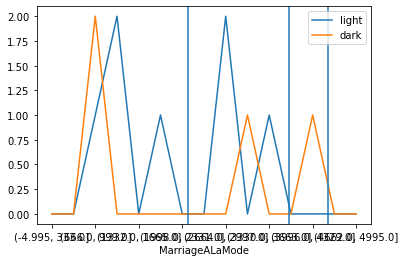

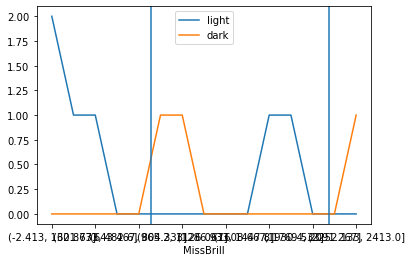

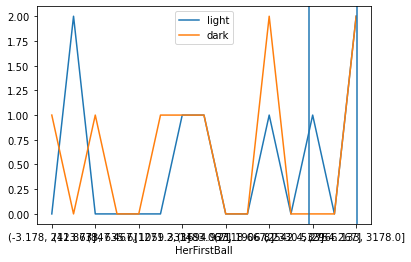

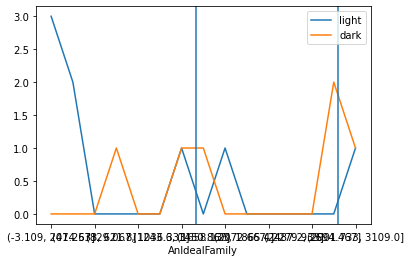

In [100]:
for story in shortStories.keys():
    plot = plotNarrativeTimes([lightRepWords, darknessRepWords], story)
    for marker in markersDict[story]:
        markerIndex = findLocation(story, marker)
        plot.axvline(markerIndex)
    plot.set_xlabel(story)

The first observation upon analyzing the graphs is that the frequencies of light and darkness words tend to be complementary--when darkness words have a high frequency, the frequency of the light-representing words goes down. This is reasonable given that light and darkness possibly represent opposite sentiments and concepts. A second observation is that the use of light and darkness words follows closely with the plot. In other words, almost all of the verticle lines representing important instances in the stories are either very close to or directly overlap with a spike in the graph.

A closer look at each of the graphs provides us with even more insight into the role darkness and light play in the stories. In "The Garden Party", darkness spikes when Laura goes to deliver the basket. Darkness, in this case, is closely associated with the deceased man's death and his social class. There is an obvious transition from light to darkness as Laura walks into the cluster of cottages: "The road gleamed white, and down below in the hollow the little cottages were in deep shade." In this particular sentence, the phrases "gleamed white" and "deep shade" form a sharp contrast of light and darkness. In "The Daughters of the Late Colonel," darkness spikes near both Mr. Farolles's visit and the sisters' going into the father's room. There is a spike of light, however, around Con's meditation in front of the Budhha. The darkness here looks to be a representation of their helplessness, not knowing what to do, and still afraid of their father. The spike of light seems to symbolize the brief escape from that helplessness during the meditation. In "The Young Girl," darkness spikes when the girl's mother goes to the casino. Both light and darkness spike before the group of three leaves the tea shop, and finally darkness spikes again when they arrive at the casino but see no sign of the mother. Here, darkness and lights seem to be closely connected with the young girl's emotions. In "Marriage a la Mode," there are spikes of both light and darkness when Williams is on the train. Right after he meets Isabelle there is a spike of light. There is another spike of darkness before Isabel receives William's letter. Darkness and light in this short story are not as easily interpretable when graphed as in other stories because there are two main characters, and the story often shifts from one perspective to another. The darkness and light in this case seem to follow both characters' emotions closely. In "Miss Brill," there is a lot of light at the beginning of the story. Darkness spikes when Miss Brill observed some other old people relaxing in the park. There is a spike of light before the young couple comes and drags Miss Brill back into the harsh reality, which is immediately followed by a spike of darkness. Here light dominates when Miss Brill is immersed in her imagination whereas darkness dominates whenever she is well aware of her reality. In "Her First Ball," darkness sparks before the fat man comes and when Leila continues to the next partner. Light spikes at the beginning of the story and continues to spike several times throughout the story, though not as much. When Leila is in her illusion of the idealized ball, light dominates, but darkness rises when she is dragged back into reality by the fat man. In "The Ideal Family," darkness spikes when Mr. Neave returns home and when he sees the old man with spider-like legs. Light dominates the beginning of the story, filled with warm descriptions of spring, before going down to zero. It then rises several times throughout the story, except only moderately. Darkness here symbolizes Mr. Neave's exhaustion, his having to work and provide for his family at this old age. Looking at darkness and light in all the stories, there seems to be something in common. Darkness seems to be symbolizing a state of being confined or trapped, whether it is by social class, gender, upbringing, age, reality, or responsibility. Light, then, symbolizes a state of being released, though maybe not permanently, from that confinement or that trap.

To further explore darkness and light as symbols of being trapped and being freed from that trap, we turn to the texts themselves. In "The Garden Party," when Laura first arrives at the gloomy cottages, they are described this way: "The lane began, smoky and dark. ... In some of them there was a flicker of light, and a shadow, crab-like, moved across the window." Words such as "smoky," "dark, and the "crab-like" shadow build a sense of hopelessness. Poverty is the confinement that traps the people living there. The "crab-like" shadow is the physical embodiment of that poverty, enclosing the people and that one "flicker of light" that represents the hope of ever escaping this poverty. In "Daughters of the Late Colonel," however, the sisters' cause of confinement is not poverty but their relationship with their father. Below is a passage that perfectly demonstrates how darkness and light function in representing that confinement.
>There had been this other life, running out, bringing things home in bags, getting things on approval, discussing them with Jug, and taking them back to get more things on approval, and arranging father’s trays and trying not to annoy father. But it all seemed to have happened in a kind of tunnel. It wasn’t real. It was only when she came out of the tunnel into the moonlight or by the sea or into a thunderstorm that she really felt herself. 

Here, tunnel, which is always completely dark unless artificially lit up, represents the sisters' confinement--their dependence on and fear of their deceased father. They are scared of burying him, and still sense his dominating presence among his things even after he has passed away. Moonlight thus represents a brief, temporary freedom from that confinement. Miss Brill from "Miss Brill" and Leila from "Her First Ball" are similar because the thing that confines them is reality, dominated by darkness. Their escape from that reality, which for Miss Brill is imagining herself as a performer in a play and for Leila is imagining a dreamy, idealized illusion of the ball, is dominated by light. Miss Brill, after being dragged back into reality by the young couple, returns from the sunny Sunday park back into her "dark room--her room like a cupboard." After the fat man tells Leila the reality behind the ball, that one day she will be old, using a black fan and wearing black velvet, she is forced to face reality until her next partner comes and she goes back into that bright, radiant illusion while dancing. The girl from 'The Young Girl" is confined by her own beauty. Throughout the entire story, her name is never mentioned, but her beauty is emphasized multiple times. All others see is her beauty. Her true self never comes out until the very end, when "her dark coat fell open, and her white throat--all her soft young body in the blue dress--was like a flower that is just emerging from its dark bud." Here "white throat" and the flower represent her true identity finally emerging from the "dark bud," her appearance that used to always outshine her inner self. Mr. Neave is confined by his "ideal" family because his son is not capable enough to take over the office so he has to keep working regardless of his old age. He sees a "little ancient fellow," which is an extension of himself, "slip past the dining-room and make for the porch, the dark drive, the carriage gates, the office." It is like he is confined to that dark drive, that office, and that tiring routine.

Since darkness symbolizes a state of being trapped or confined, the darkness level, a measurement of how trapped they are, of each of the characters can be visualized by plotting the number of times the characters appear in the same paragraph as a darkness word. Similarly, the light level of the characters can also be plotted. The limitation of this technique is that it is not completely accurate. Being in the same paragraph does not necessarily mean that the light or darkness is associated with that character. Furthermore, not every single mention of light and darkness symbolizes something, some are just simple descriptions. 

In [103]:
# Function that extracts all of the characters in a story and puts them into a list
nlp = spacy.load('en_core_web_lg')
def getCharacters(story):
    characters = [ent.text.strip() for ent in nlp(shortStories[story]).ents if ent.label_ == 'PERSON']
    noDuplicates = []
    for char in characters:
        if char not in noDuplicates:
            noDuplicates.append(char)
    return noDuplicates

In [104]:
# Splits the short stories into paragraphs
shortStoresParas = {key: val.split('\n\n') for key, val in shortStories.items()}

In [105]:
# Returns true if any of the words in the list exists in the text
def listInText(lst, text):
    for item in lst:
        if item in text:
            return True
    return False

In [106]:
# Counts the number  of times a character appears in the same paragraph as either 
def count(character, wordList, story):
    count = 0
    for para in shortStoresParas[story]:
        if character in para and listInText(wordList, para):
            count = count + 1
    return count
            

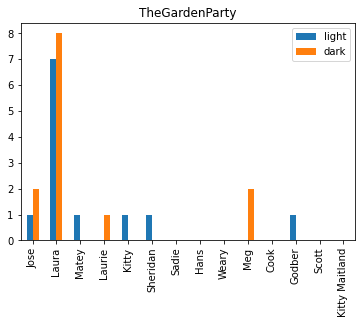

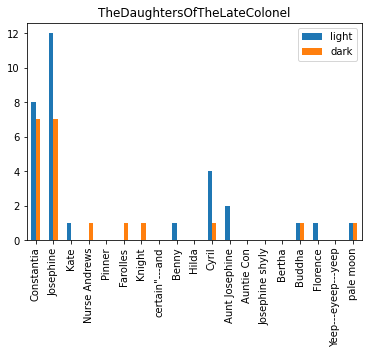

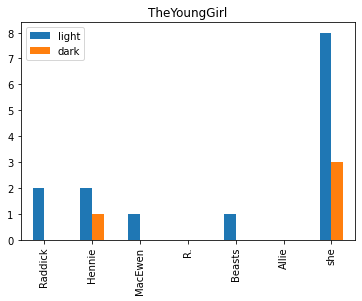

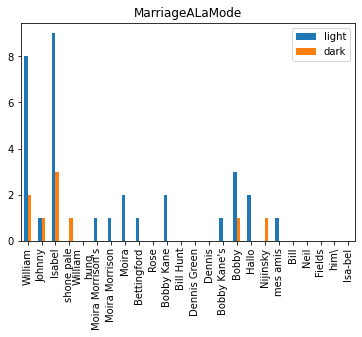

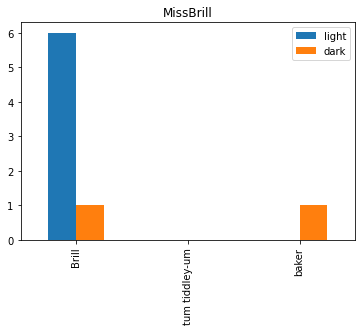

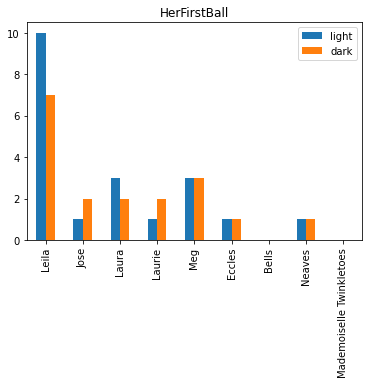

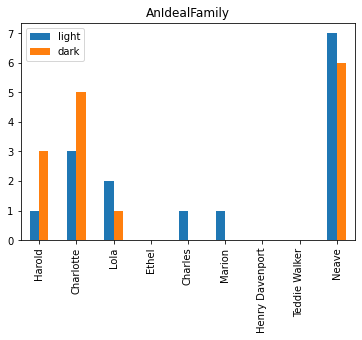

In [107]:
# Plots the light and darkness level of all of the characters in the stories. 
for story in shortStories.keys():
    characters = getCharacters(story)
    if story == 'AnIdealFamily':
        characters.append('Neave')
    if story == 'TheYoungGirl':
        characters.append('she')
    countDict = {key: 0 for key in ['light', 'dark']}
    for character in characters:
        countDict['light'] = [count(character, lightRepWords, story) for character in characters]
        countDict['dark'] = [count(character, darknessRepWords, story) for character in characters]
    plotdata = pd.DataFrame(countDict, index=characters)
    plt = plotdata.plot(kind="bar", title = story)

The darkness and light levels of the characters reveal interesting insights about the characters as well as the themes of the stories. One of the most prevalent themes in Mansfield's short stories is social class, which is in both "The Garden Party" and "Her First Ball." Laura and Leila, with their high darkness levels, contribute to the building of that theme. Mansfield is considered to be a writer "in rebellion against the conformity and dreariness of her colonial upper middle class upbringing" and a writer who "kicks against those who would dismiss her as 'the brassy little shopgirl of literature'" (Ferrall 118). Using darkness as a symbol, Mansfield creates a confined but kind Laura and criticizes "middle class snobbery" by contrasting Laura with the rest of her family (116). In the graph for "The Garden Party," Laura's darkness level is the highest by a large margin. One of the reasons is her being the only main character of the story. Near the beginning of the story we learn that Laura wears a black hat and a "long black velvet ribbon." Here the black hat, building from the symbolism of darkness, represents her being trapped by her social class, in other words her upbringing. Because she comes from a well-off family, there are many things that she does not understand and many places she has not seen due to her privileges. In this case, she is trapped by a certain innocence, or ignorance, that is unique to her social class. By asking the poor man's mother to forgive her hat she is perhaps also asking her to forgive her ignorance and innocence. Laura is also trapped by her family because they are not capable of sharing her empathy and thinks that she is absurd for wanting to cancel the party just because a poor man has passed away. By going into the poor neighborhood and looking directly at the dead body of the man she breaks out of the confinement of her social class. The darkness in this short story not only represents the poverty that confines the poor but also is the very thing that breaks Laura out of her own confinement. Leila from "Her First Ball," is also confined by her upbringing. Meg refers to her as "my little country cousin," and Leila is well aware of her own upbringing so feels nervous and uncomfortable. Since she has never been to a ball before, she imagines this idealized, elevated, illusory version of the ball and immerses herself in the illusion instead of the reality: "The lights, the azaleas, the dresses, the pink faces, the velvet chairs, all became one beautiful flying wheel." That bright, luxurious illusion explains why her light level is even higher than her darkness level.

Under Mansfield's beautiful story-telling, there lies a "subtle, or discreet, feminist voice" (D'Souza 67). The theme of gender is present in the stories "The Young Girl," "Her First Ball," and "Miss Brill." The darkness that confines the young girl is her beauty. Her inner self is trapped, by her beauty and by how others look at her because of her appearance. Her beauty outshines her identity. Everyone, men especially, pay attention only to her beauty and often has no regard for her true inner identity. She feels uncomfortable whenever men stare at her, and even calls them "beasts." In the story, she complains: "'..., and being stared at by old fat men. Beasts!'” When she "shook the poor little puff as though she loathed it," she seems to hate her beauty, but yet has to maintain it anyway due to societal standards. The high light level of the young girl is likely due to descriptions of her beauty instead of her being freed from her confinement since the only instance of her true self finally shining through is at the end of the story, when she finally emerges out of her dark coat like a flower. In "Her First Ball," Leila has both the highest light and dark levels. Not only is she trapped by reality and social class, but she is also trapped by her gender. The fat man tells her that soon she will be old, and old women do not dance, they only sit and look on miserably. Yet, the fat man is old, and he is dancing anyway. After her conversation with the fat man, Leila is forced to face her gender, which is part of the dark reality that traps her. Her high level could be explained by her bright illusion of the ball, and how fast she recovers from the disappointment of reality and leaps right back into her beautiful illusion. This conflict between the fat man and Leila is a subtle critique of the unequal treatment of and limitations put on women during that time. In "Miss Brill," Miss Brill plays the role of an observer or outsider. The darkness for Miss Brill is her reality. She is looked down upon by the young couple, probably because she is an old woman who is alone and immersed in her own world. The high light level is due to her bright imaginary world where she is a performer on stage wearing that special fur. Mansfield focuses the story on the world of an old woman without a partner to provide a new perspective the society at that time is unfamiliar with. 

Another important theme in Mansfield's stories is relationships, especially family relationships and the responsibilities involved. This theme is present in the stories "Marriage a la Mode," "The Daughters of the Late Colonel," and "An Ideal Family." "Marriage a la Mode" focuses on the relationship between husband and wife. The darkness for both William and Isabel is their marriage. William is trapped because he has to provide for Isabel, which is his duty as a husband in their society, even though she has almost completely abandoned her duties as a wife and a mother. William at the end of the story decides to evict his darkness by writing the letter. Isabel is trapped by that same marriage and by her responsibilities before becoming the "new" Isabel, who used to be discontent and unhappy in that old house. Now, however, the darkness for Isabel becomes her relationship with her friends. She provides for them and, at the end of the story, chooses to keep her responsibility as a friend and abandons William even though she has realized how vain she and her friends are. Isabel escapes her confinement by abandoning her responsibilities in marriage yet is only dragged into a new trap. Mansfield uses the story of a dynamic marriage in which the traditional gender roles are almost completely reversed to demonstrate a conflict between relationships and responsibilities. "The Daughters of the Late Colonel" focuses on the father-daughter relationship of the colonel and his daughters, which is the very thing that confines the sisters in a dark helplessness, and is the cause of their equally high darkness levels. After their dominant father's death, the sisters' fear of their father is still prevalent, and they are rendered into a state of not knowing what to do. They are only freed briefly from their father's confinement through imagination or meditation. Through this story, Mansfield tells the dark aftermaths of a possibly abusive relationship. In "An Ideal Family," the high darkness level of old Mr. Neave is caused by his being confined to his work by his family. The darkness for him is his responsibility to provide for his family, even though he has been working so much that he feels he doesn't know who his wife and children are anymore. In their vibrant, bright, and youthful lives and house, old Mr. Neave feels like an outsider. The high light level of Mr. Neave is likely due to his being in the same paragraphs as descriptions of the lively house and the warm, bright spring. Through characters like Mr. Neave and William, Mansfield presents the dark confinement that familial responsibility puts onto a person. 

With computational analysis techniques and visualizations, we can explore how darkness and light function as symbolisms in *The Garden Party and Other Stories*. Using darkness as a symbolism of confinement and light as a symbol of being freed from that confinement, Mansfield creates interesting characters and further develops themes including social class, gender, and relationships.  

## References

D’Souza, Karen. “Enabling Modernisms: Discrete/Discreet Feminisms in Katherine Mansfield and Anita Desai.” *Journal of New Zealand Literature (JNZL)*, no. 38.2, 2020, pp. 59–81. JSTOR, https://www.jstor.org/stable/26944128. Accessed 12 Aug. 2022.

Ferrall, Charles. “Katherine Mansfield and the Working Classes.” *Journal of New Zealand Literature (JNZL)*, no. 32, 2014, pp. 106–20. JSTOR, http://www.jstor.org/stable/43198606. Accessed 13 Aug. 2022.

